In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot 
import os
import sklearn

# For Task #2.2
import random
from sklearn.model_selection import train_test_split

# For Task #3.3
import seaborn

# For Task #4
from sklearn.preprocessing import LabelEncoder

# For Task #5
from sklearn import metrics
from matplotlib.patches import Patch
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold

# For Task #7
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz


# For rendering the plots *in* a notebook
%matplotlib inline

# For disabling 'SettingWithCopyWarning' warning
pd.options.mode.chained_assignment = None  # default='warn'

# Task #1 — Mix the training and testing data

### 1. Reading the training and testing data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Output

In [3]:
print('\n----------------/ Train Data /----------------\n')
train.info(verbose = False)
print('\n\n----------------/ Test Data /----------------\n')
test.info(verbose = False)


----------------/ Train Data /----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Columns: 13 entries, Loan_ID to Loan_Status
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


----------------/ Test Data /----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Columns: 12 entries, Loan_ID to Property_Area
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### 2. Concatenating the training and testing data

In [4]:
train_test = pd.concat([train, test])

#### Output

In [5]:
train_test.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Columns: 13 entries, Loan_ID to Loan_Status
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


# Task #2 — Separate data into three subsets: train, test, blind (with missing data)

## Task #2.1 — Separate automatically

### 1. Separating rows with correctly filled data into new dataset

In [6]:
train_test_without_missing = train_test.dropna(axis = 0)

#### Output

In [7]:
train_test_without_missing.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Columns: 13 entries, Loan_ID to Loan_Status
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [8]:
train_test_without_missing.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 2. Separating rows with missing data automatically into new dataset

In [9]:
blind = train_test[train_test.isnull().any(axis = 1)]

#### Output

In [10]:
print('\n--------------/ Blind Data /--------------\n')
blind.info(verbose = False)
print('\n\n------/ Blind Data (first 10 rows) /------\n')
blind.head(10)


--------------/ Blind Data /--------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 366
Columns: 13 entries, Loan_ID to Loan_Status
dtypes: float64(4), int64(1), object(8)
memory usage: 54.8+ KB


------/ Blind Data (first 10 rows) /------



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N


In [11]:
blind.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

## Task #2.2 — Separate randomly

### Separating the merged training and testing data randomly with proportions 70:30

In [12]:
train_without_missing, test_without_missing = train_test_split(train_test_without_missing, test_size = 0.3, random_state = 32)

#### Output

In [13]:
print(f'Training examples: {train_without_missing.shape[0]} entries')
print(f'Testing examples: {test_without_missing.shape[0]} entries')

Training examples: 336 entries
Testing examples: 144 entries


# Task #3 — Data munging: fill missing data, treat extremums and transform data

## Task #3.1 — Fill missing data

### 1. Filling missing values in the Blind dataset

#### Initial output

In [14]:
blind.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

#### Input

In [15]:
gender = ['Male', 'Female']
blind['Gender'] = np.random.choice(list(gender), len(blind))

married = ['Yes', 'No']
blind['Married'] = np.random.choice(list(married), len(blind))

dependents = ['0', '1', '2', '3+']
blind['Dependents'] = np.random.choice(list(dependents), len(blind))

blind['LoanAmount'].fillna(blind['LoanAmount'].mean(), inplace = True)

selfEmployed = ['Yes', 'No']
blind['Self_Employed'] = np.random.choice(list(selfEmployed), len(blind))

blind['ApplicantIncome'].fillna(blind['ApplicantIncome'].mean(), inplace = True)
blind['Loan_Amount_Term'].fillna(blind['Loan_Amount_Term'].mean(), inplace = True)
blind['Credit_History'].fillna(blind['Credit_History'].mean(), inplace = True)

loanStatus = ['Y', 'N']
blind['Loan_Status'] = np.random.choice(list(loanStatus), len(blind))


#### Output

In [16]:
blind.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 2. Converting categorical values to numerical in the Blind dataset 

#### Initial output

In [17]:
blind.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Input

In [18]:
var_mod = ['Married', 'Gender', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    blind[i] = le.fit_transform(blind[i])

#### Output

In [19]:
blind.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

## Task #3.2 — Treat extreme values

### 1. Filtering the data from the outliers

#### Initial output

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Gender'>

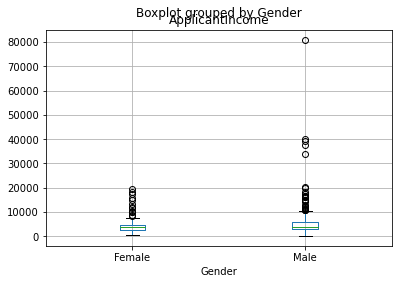

In [20]:
train_test_without_missing.boxplot(column = 'ApplicantIncome', by = 'Gender')

#### Input

In [21]:
Q1 = train_test_without_missing['ApplicantIncome'].quantile(0.25)
Q3 = train_test_without_missing['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

filter = (train_test_without_missing['ApplicantIncome'] >= Q1 - 1.5 * IQR) & (train_test_without_missing['ApplicantIncome'] <= Q3 + 1.5 * IQR)

filtered_train_test = train_test_without_missing.loc[filter]

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Gender'>

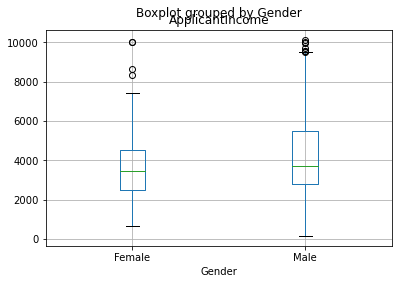

In [22]:
filtered_train_test.boxplot(column = 'ApplicantIncome', by = 'Gender')

### 2. Converting categorical values to numerical in the filtered dataset

#### Initial output

In [23]:
filtered_train_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Input

In [24]:
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    filtered_train_test[i] = le.fit_transform(filtered_train_test[i])

#### Output

In [25]:
filtered_train_test.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

### 3. Concatenating filtered and Blind datasets to get one final dataset

In [26]:
ds = pd.concat([filtered_train_test, blind])

#### Output

In [27]:
ds.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 1 to 366
Columns: 13 entries, Loan_ID to Loan_Status
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 77.2+ KB


## Task #3.3 — Transform data

### 1. Splitting final dataset randomly into training and testing datasets in proportions 70:30

In [28]:
train, test = train_test_split(ds, test_size = 0.3, random_state = 47)

#### Output

In [30]:
print('\n----------------/ Train Data /----------------\n')
train


----------------/ Train Data /----------------



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
590,LP002928,1,1,0,0,0,3000,3416.0,56.0,180.0,1.0,1,1
417,LP002342,1,1,2,0,1,1600,20000.0,239.0,360.0,1.0,2,0
170,LP001961,1,0,3,0,1,3958,0.0,110.0,360.0,1.0,0,0
263,LP001871,0,0,0,0,0,7200,0.0,120.0,360.0,1.0,0,1
79,LP001419,1,1,3,0,0,7950,0.0,185.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,LP001078,0,1,3,1,1,3091,0.0,90.0,360.0,1.0,2,0
371,LP002197,1,1,2,0,0,5185,0.0,155.0,360.0,1.0,1,1
455,LP002455,1,1,2,0,0,3859,0.0,96.0,360.0,1.0,1,1
328,LP002806,1,1,3,0,0,6958,1411.0,150.0,360.0,1.0,0,1


In [31]:
print('\n\n----------------/ Test Data /----------------\n')
test



----------------/ Test Data /----------------



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
477,LP002530,1,0,2,0,1,2873,1872.0,132.0,360.00000,0.0,1,1
235,LP001784,1,1,1,0,0,5500,1260.0,170.0,360.00000,1.0,0,1
57,LP001321,0,0,0,0,1,3613,3539.0,134.0,180.00000,1.0,1,0
84,LP001450,0,0,1,0,1,4456,0.0,131.0,180.00000,0.0,1,1
95,LP001499,0,0,3,0,1,6260,0.0,110.0,360.00000,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,LP001633,1,1,1,0,0,6400,7250.0,180.0,360.00000,0.0,2,0
45,LP001137,0,0,2,0,0,3410,0.0,88.0,342.35343,1.0,2,0
501,LP002606,0,0,0,0,0,3159,0.0,100.0,360.00000,1.0,1,1
172,LP001586,1,1,3,1,0,3522,0.0,81.0,180.00000,1.0,0,0


### 2. Transforming the data using logarithmic function

#### Initial output

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

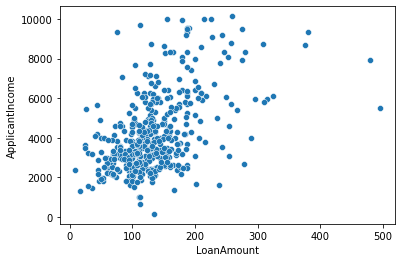

In [32]:
seaborn.scatterplot(x = filtered_train_test['LoanAmount'], y = filtered_train_test['ApplicantIncome'])

#### Input

In [33]:
filtered_train_test['LoanAmount_log'] = np.log(filtered_train_test['LoanAmount'])
filtered_train_test['ApplicantIncome_log'] = np.log(filtered_train_test['ApplicantIncome'])

#### Output

<AxesSubplot:xlabel='LoanAmount_log', ylabel='ApplicantIncome_log'>

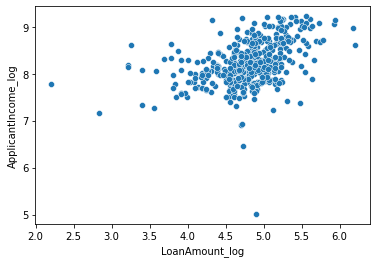

In [34]:
seaborn.scatterplot(x = filtered_train_test['LoanAmount_log'], y = filtered_train_test['ApplicantIncome_log'])

# Task #4 — Apply K-fold cross-validation with visualization using different learning models

## Task #4.1 — Initiate generic function for making a classification model and accessing performance

In [241]:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])  # Fit the model
    predictions = model.predict(data[predictors]) # Make predictions on training set

    accuracy = metrics.accuracy_score(predictions, data[outcome])  #Print accuracy
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    skf = StratifiedKFold(n_splits = 10)  #Perform stratified k-fold cross-validation with 10 folds
    skf.get_n_splits(data[predictors], data[outcome])
    error = []

    for train, test in skf.split(data[predictors], data[outcome]):
        train_predictors = (data[predictors].iloc[train,:])  # Filter training data
        train_target = data[outcome].iloc[train]  # The target we're using to train the algorithm
        model.fit(train_predictors, train_target)  # Training the algorithm using the predictors and target
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))  #Record error from each cross-validation run

    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictors], data[outcome])  #Fit the model again so that it can be refered outside the function

## Task #4.2 — Explore LogisticRegression model

#### Education

In [242]:
outcome_var = 'Education'
model = LogisticRegression()
predictor_var = ['LoanAmount']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 77.052%
Cross-Validation Score : 77.051%


#### Self_Employed

In [243]:
outcome_var = 'Self_Employed'
model = LogisticRegression()
predictor_var = ['ApplicantIncome', 'Credit_History', 'Loan_Status']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 67.173%
Cross-Validation Score : 67.175%


#### Loan_Status

In [244]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Education', 'Self_Employed', 'Credit_History']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 65.502%
Cross-Validation Score : 65.352%


## Task #4.3 — Explore DecisionTreeClassifier model

### 1. Exploring 'Education' target

#### 1.1 Creating initial combination of original target and parameters

In [245]:
ds.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [299]:
outcome_var = 'Education'
model = DecisionTreeClassifier()
predictor_var = ['Married', 'Self_Employed', 'ApplicantIncome', 'Credit_History', 'Property_Area', 'Loan_Status']
classification_model(model, train ,predictor_var, outcome_var)

Accuracy : 99.848%
Cross-Validation Score : 66.564%


#### 1.2 Creating a series with feature importances

In [300]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
print (featimp)

ApplicantIncome    0.646010
Loan_Status        0.082413
Property_Area      0.076914
Self_Employed      0.075481
Married            0.063310
Credit_History     0.055872
dtype: float64


#### 1.3 Visualizing a series with feature importances

<AxesSubplot:>

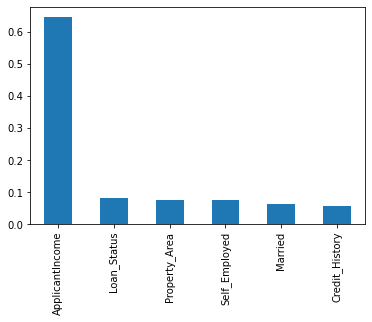

In [301]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
featimp.nlargest(10).plot(kind = 'bar')

#### 1.4 Improving learning perfomance of the original target by choosing the best combination of parameters

In [308]:
outcome_var = 'Education'
model = DecisionTreeClassifier()
predictor_var = ['ApplicantIncome', 'Loan_Status']
classification_model(model, train ,predictor_var, outcome_var)

Accuracy : 97.568%
Cross-Validation Score : 67.331%


### 2. Exploring 'Self-Employed' target

#### 2.1 Creating initial combination of original target and parameters

In [314]:
outcome_var = 'Self_Employed'
model = DecisionTreeClassifier()
predictor_var = ['Married', 'Education', 'ApplicantIncome', 'Property_Area', 'Loan_Status']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 99.392%
Cross-Validation Score : 56.382%


#### 2.2 Creating a series with feature importances

In [315]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
print (featimp)

ApplicantIncome    0.743534
Property_Area      0.097863
Married            0.073843
Education          0.057386
Loan_Status        0.027374
dtype: float64


#### 2.3 Visualizing a series with feature importances

<AxesSubplot:>

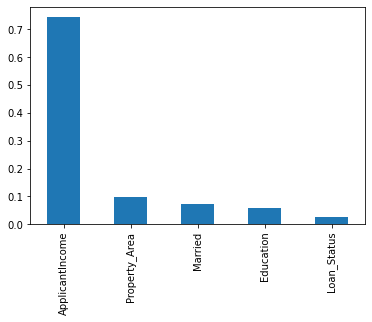

In [316]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
featimp.nlargest(10).plot(kind = 'bar')

#### 2.4 Improving learning perfomance of the original target by choosing the best combination of parameters

In [322]:
outcome_var = 'Self_Employed'
model = DecisionTreeClassifier()
predictor_var = ['ApplicantIncome', 'Property_Area']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 97.416%
Cross-Validation Score : 57.904%


### 3. Exploring 'Loan Status' target

#### 3.1 Creating initial combination of original target and parameters

In [323]:
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Gender', 'Self_Employed', 'LoanAmount', 'Credit_History', 'Property_Area']
classification_model(model, train ,predictor_var, outcome_var)

Accuracy : 93.769%
Cross-Validation Score : 56.371%


#### 3.2 Creating a series with feature importances

In [324]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
print (featimp)

LoanAmount        0.688278
Property_Area     0.090537
Credit_History    0.088645
Self_Employed     0.076166
Gender            0.056374
dtype: float64


#### 3.3 Visualizing a series with feature importances

<AxesSubplot:>

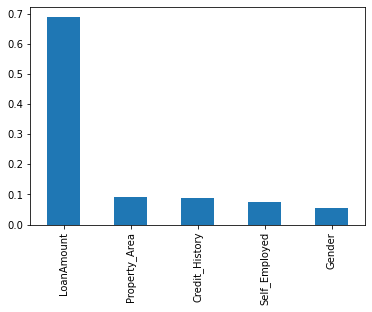

In [325]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
featimp.nlargest(10).plot(kind = 'bar')

#### 3.4 Improving learning perfomance of the original target by choosing the best combination of parameters

In [330]:
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['LoanAmount', 'Credit_History', 'Property_Area']
classification_model(model, train ,predictor_var, outcome_var)

Accuracy : 84.802%
Cross-Validation Score : 50.776%


## Task #4.4 — Explore RandomForestClassifier model

### 1. Exploring 'Education' target

#### 1.1 Creating initial combination of original target and parameters

In [331]:
outcome_var = 'Education'
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 15)
predictor_var = ['Married', 'Self_Employed', 'ApplicantIncome', 'Credit_History', 'Property_Area', 'Loan_Status']
classification_model(model, train ,predictor_var, outcome_var)

Accuracy : 80.091%
Cross-Validation Score : 76.289%


#### 1.2 Creating a series with feature importances

In [332]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
print (featimp)

ApplicantIncome    0.655073
Credit_History     0.093088
Property_Area      0.088056
Married            0.056349
Loan_Status        0.054392
Self_Employed      0.053043
dtype: float64


#### 1.3 Visualizing a series with feature importances

<AxesSubplot:>

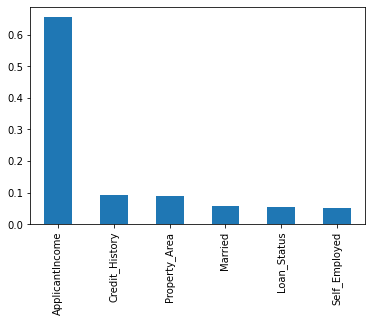

In [334]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
featimp.nlargest(10).plot(kind = 'bar')

#### 1.4 Improving learning perfomance of the original target by choosing the best combination of parameters

In [342]:
outcome_var = 'Education'
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 15)
predictor_var = ['Married', 'ApplicantIncome', 'Credit_History', 'Property_Area']
classification_model(model, train ,predictor_var, outcome_var)

Accuracy : 80.547%
Cross-Validation Score : 75.986%


### 2. Exploring 'Self-Employed' target

#### 2.1 Creating initial combination of original target and parameters

In [343]:
outcome_var = 'Self_Employed'
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 15)
predictor_var = ['Married', 'Education', 'ApplicantIncome', 'Property_Area', 'Loan_Status']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 75.228%
Cross-Validation Score : 65.648%


#### 2.2 Creating a series with feature importances

In [344]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
print (featimp)

ApplicantIncome    0.751995
Property_Area      0.099754
Loan_Status        0.050339
Education          0.050068
Married            0.047844
dtype: float64


#### 2.3 Visualizing a series with feature importances

<AxesSubplot:>

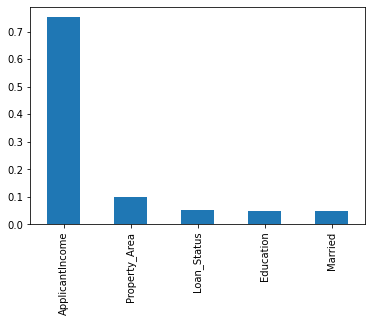

In [346]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
featimp.nlargest(10).plot(kind = 'bar')

#### 2.4 Improving learning perfomance of the original target by choosing the best combination of parameters

In [351]:
outcome_var = 'Self_Employed'
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 15)
predictor_var = ['ApplicantIncome', 'Property_Area', 'Loan_Status']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 78.723%
Cross-Validation Score : 61.086%


### 3. Exploring 'Loan Status' target

#### 3.1 Creating initial combination of original target and parameters

In [353]:
outcome_var = 'Loan_Status'
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 15)
predictor_var = ['Gender', 'Self_Employed', 'LoanAmount', 'Credit_History', 'Property_Area']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 78.116%
Cross-Validation Score : 61.692%


#### 3.2 Creating a series with feature importances

In [357]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
print (featimp)

LoanAmount        0.551510
Credit_History    0.197820
Property_Area     0.097812
Gender            0.087097
Self_Employed     0.065763
dtype: float64


#### 3.3 Visualizing a series with feature importances

<AxesSubplot:>

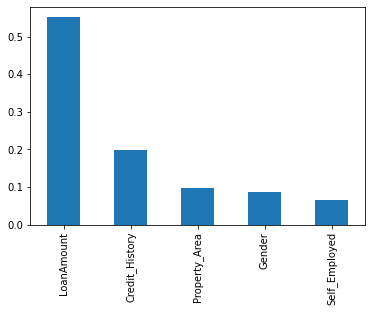

In [358]:
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
featimp.nlargest(10).plot(kind = 'bar')

#### 3.4 Improving learning perfomance of the original target by choosing the best combination of parameters

In [369]:
outcome_var = 'Loan_Status'
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 15)
predictor_var = ['Gender', 'LoanAmount', 'Credit_History', 'Property_Area']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 78.116%
Cross-Validation Score : 60.177%


# Task #4.5 — Improve final performance by choosing the best combination of the learning models and parameter tunning

#### Education

In [342]:
outcome_var = 'Education'
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 15)
predictor_var = ['Married', 'ApplicantIncome', 'Credit_History', 'Property_Area']
classification_model(model, train ,predictor_var, outcome_var)

Accuracy : 80.547%
Cross-Validation Score : 75.986%


#### Self-Employed

In [351]:
outcome_var = 'Self_Employed'
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 15)
predictor_var = ['ApplicantIncome', 'Property_Area', 'Loan_Status']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 78.723%
Cross-Validation Score : 61.086%


#### Loan Status

In [369]:
outcome_var = 'Loan_Status'
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 15)
predictor_var = ['Gender', 'LoanAmount', 'Credit_History', 'Property_Area']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 78.116%
Cross-Validation Score : 60.177%
